Challenge #2

Dataset from http://peterhcharlton.github.io/RRest/bidmc_dataset.html

```
Data of
  electrocardiogram (ECG)  
  pulse oximetry (photoplethysmogram, PPG)  
  impedance pneumography respiratory signals  
  
  acquired from intensive care patients
  
  n = 52
 ```
 
 Data downloaded with the command:  
 `$ wget -r --no-parent --reject "index.html*" https://physionet.org/physiobank/database/bidmc/bidmc_csv/`
 
and uploaded to Google Drive for usage in Colab Notebook

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/!hackhealth"

bidmc_csv  bidmc_data.mat


In [0]:
import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/!hackhealth/bidmc_data.mat')

Explore data in `.mat` format

In [0]:
data = mat['data']

In [0]:
data[0][0][0][0][0][0]

array(['s01182'], dtype='<U6')

In [0]:
data[0][1]

In [0]:
!ls "/content/drive/My Drive/!hackhealth/bidmc_csv"

In [0]:
import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


Explore data in `.csv` format

In [0]:
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn
import statsmodels

from pandas import Series
from matplotlib import pyplot
series_s = pd.read_csv('/content/drive/My Drive/!hackhealth/bidmc_csv/bidmc_01_Signals.csv')
series_s.head()
#series.plot()


,Time [s],RESP,PLETH,V,AVR,II
0,0.000,0.35386,0.43597,0.52549,0.30392,0.72549
1,0.008,0.35679,0.43206,0.51961,0.33529,0.67059
2,0.016,0.35875,0.42815,0.51569,0.37451,0.60980
3,0.024,0.36168,0.42424,0.50588,0.41961,0.55098
4,0.032,0.36364,0.42131,0.50980,0.44902,0.50000


In [0]:
series_s.index

RangeIndex(start=0, stop=60001, step=1)

In [0]:
series_s.describe()

,Time [s],RESP,PLETH,V,AVR,II
count,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000
mean,240.000000,0.463901,0.465795,0.479294,0.477605,0.464972
std,138.567529,0.320779,0.065513,0.166586,0.160749,0.232832
min,0.000000,0.000000,0.223850,-0.501960,-0.498040,-0.501960
25%,120.000000,0.187680,0.410560,0.490200,0.470590,0.345100
50%,240.000000,0.347020,0.446730,0.509800,0.539220,0.374510
75%,360.000000,0.760510,0.509290,0.525490,0.554900,0.480390
max,480.000000,1.000000,0.697950,1.503900,1.047100,1.503900


In [0]:
series_s.index

RangeIndex(start=0, stop=60001, step=1)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


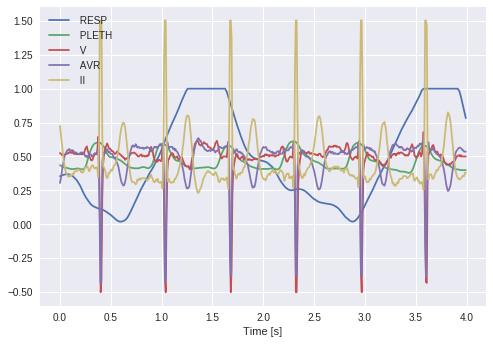

In [0]:
series_s \
  .head(500) \
  .plot(x='Time [s]', y=[' RESP', ' PLETH', ' V', ' AVR', ' II'])

In [0]:
series_n = pd.read_csv('/content/drive/My Drive/!hackhealth/bidmc_csv/bidmc_01_Numerics.csv')
series_n.head()

,Time [s],HR,PULSE,RESP,SpO2
0,0,94,93.0,25,97.0
1,1,94,93.0,25,97.0
2,2,94,93.0,25,97.0
3,3,92,93.0,26,97.0
4,4,93,93.0,26,97.0


In [0]:
series_n.index

RangeIndex(start=0, stop=481, step=1)

In [0]:
series_n.describe()

,Time [s],HR,PULSE,RESP,SpO2
count,481.000000,481.000000,468.000000,481.000000,468.000000
mean,240.000000,91.318087,91.008547,21.438669,96.916667
std,138.997002,1.012765,1.137229,1.296181,0.357693
min,0.000000,88.000000,89.000000,20.000000,96.000000
25%,120.000000,91.000000,90.000000,21.000000,97.000000
50%,240.000000,91.000000,91.000000,21.000000,97.000000
75%,360.000000,92.000000,91.000000,22.000000,97.000000
max,480.000000,95.000000,94.000000,26.000000,98.000000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


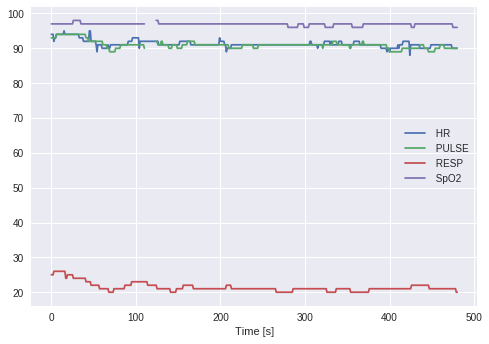

In [0]:
series_n \
  .head(481) \
  .plot(x='Time [s]', y=[' HR', ' PULSE', ' RESP', ' SpO2'])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


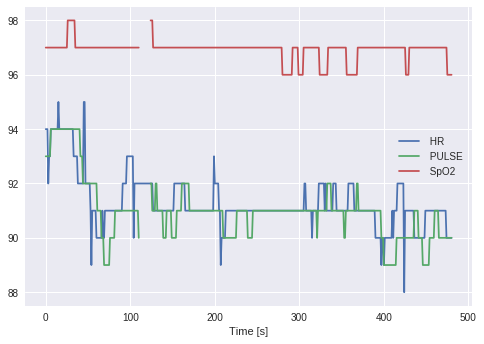

In [0]:
# Remove RESP from chart to explore HR, PULSE, SpO2 more distinctly
series_n \
  .head(481) \
  .plot(x='Time [s]', y=[' HR', ' PULSE', ' SpO2'])

In [0]:
series_b = pd.read_csv('/content/drive/My Drive/!hackhealth/bidmc_csv/bidmc_01_Breaths.csv')
series_b.head()

,breaths ann1 [signal sample no],breaths ann2 [signal sample no]
0,189,187
1,476,472
2,737,747
3,1037,1042
4,1324,1322


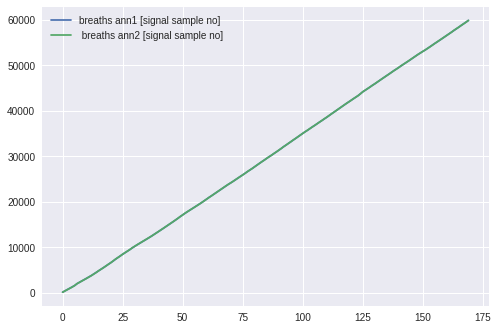

In [0]:
series_b.plot()

Dataset originally was used in the paper:  
https://ieeexplore.ieee.org/document/7748483  
"Toward a Robust Estimation of Respiratory Rate From Pulse Oximeters" (Marco A. F. Pimentel, et al)

Challenge is to predict respiratory rate from PPG waveform

Strategy is to try out LSTM (Long-Short-Term-Memory), a type of RNN (Recurrent Neural Network), to predict dataset's feature "RESP" (respiratory rate (in Numeric data), % respiratory volume (in Signal data)) using dataset's features:  
- HR (heart rate)
- Pulse (pulse)
- SpO2 (peripheral blood oxygen saturation)
- PLETH (change in volume; plethysmograph)
- V (a unipolar lead in ECG attached to 1 of 6 chest position; precordial)
- AVR (a unipolar lead in ECG attached to 1 of 3 limbs; lead #4)
- II (a bipolar lead in ECG attached to 1 of 3 limb)